In [10]:
import pandas as pd
import datetime

filepath = '../../candle_data/BINANCE_BTCUSDT, 60.csv'

df = pd.read_csv(filepath, index_col='time',
     usecols=['time', 'open', 'high', 'low', 'close', 'volume'],
     parse_dates=['time'],
     date_parser=lambda epoch: pd.to_datetime(epoch, unit='s')
     )

print(df)

                         open      high       low     close       volume
time                                                                    
2018-01-01 00:00:00  13715.65  13715.65  13400.01  13529.01   443.356199
2018-01-01 01:00:00  13528.99  13595.89  13155.38  13203.06   383.697006
2018-01-01 02:00:00  13203.00  13418.43  13200.00  13330.18   429.064572
2018-01-01 03:00:00  13330.26  13611.27  13290.00  13410.03   420.087030
2018-01-01 04:00:00  13434.98  13623.29  13322.15  13601.01   340.807329
...                       ...       ...       ...       ...          ...
2020-01-17 00:00:00   8720.15   8743.99   8672.44   8690.31  1988.852577
2020-01-17 01:00:00   8690.25   8738.80   8677.01   8738.51  1156.787342
2020-01-17 02:00:00   8738.80   8780.00   8718.16   8757.06  2083.041074
2020-01-17 03:00:00   8757.29   8840.40   8751.05   8786.43  3103.062255
2020-01-17 04:00:00   8786.43   8808.92   8760.00   8791.05  1329.841605

[17829 rows x 5 columns]


In [2]:
import numpy as np

week_start = 1 
rate = 0.4
this_week = -1
week_open_price = np.NaN
high = np.NaN
low = np.NaN

df['week_low'] = np.NaN
for i in range(len(df.index)):
    candle = df.iloc[i]
    dayofweek = df.index[i].dayofweek
    if this_week != dayofweek:
        this_week = dayofweek
        if dayofweek == week_start:
            week_open_price = candle.open
            # 새로 한주가 시작되었다면 이전에 만들어 놓은 high, low를 돌파변수로 이용한다.
            volatility = high - low
            high = np.NaN
            low = np.NaN
            print('새로운 한주가 시작됨! > ', df.index[i], ', week: ', this_week ,', week_open_price: ', week_open_price,
                  ', volat: ', volatility)
    # print(df.index[i], 'OPEN: ',  week_open_price, ', VOLAT: ', volatility)
    # print(df.index[i], ' UPPER: ', week_open_price + rate * volatility, ', LOWER: ', week_open_price - rate * volatility)
    # print(df.index[i], candle)
    high = np.nanmax([high, candle.high])
    low = np.nanmin([low, candle.low])
    # print(i, df.index[i], candle.high, candle.low, high, low)
    # print('----')
    if i == 5000:
        break


새로운 한주가 시작됨! >  2018-01-02 00:00:00 , week:  1 , week_open_price:  13382.16 , volat:  1068.5499999999993
새로운 한주가 시작됨! >  2018-01-09 00:00:00 , week:  1 , week_open_price:  14902.54 , volat:  4364.240000000002
새로운 한주가 시작됨! >  2018-01-16 00:00:00 , week:  1 , week_open_price:  13500.0 , volat:  4100.0
새로운 한주가 시작됨! >  2018-01-23 00:00:00 , week:  1 , week_open_price:  10760.05 , volat:  4507.93
새로운 한주가 시작됨! >  2018-01-30 00:00:00 , week:  1 , week_open_price:  11250.11 , volat:  2339.0
새로운 한주가 시작됨! >  2018-02-06 00:00:00 , week:  1 , week_open_price:  6939.63 , volat:  4683.42
새로운 한주가 시작됨! >  2018-02-13 00:00:00 , week:  1 , week_open_price:  8903.0 , volat:  3065.7700000000004
새로운 한주가 시작됨! >  2018-02-20 00:00:00 , week:  1 , week_open_price:  11147.11 , volat:  2923.0
새로운 한주가 시작됨! >  2018-02-27 00:00:00 , week:  1 , week_open_price:  10321.0 , volat:  2511.210000000001
새로운 한주가 시작됨! >  2018-03-06 00:00:00 , week:  1 , week_open_price:  11455.0 , volat:  1589.0
새로운 한주가 시작됨! >  2018-03-13 0

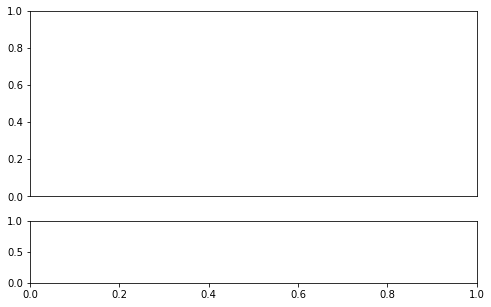

In [3]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(8, 5))
fig.set_facecolor('w')
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])
axes = []
axes.append(plt.subplot(gs[0]))
axes.append(plt.subplot(gs[1], sharex=axes[0]))
axes[0].get_xaxis().set_visible(False)


In [4]:
# df.plot(subplots=True, legend=False)
# 
# from matplotlib import pyplot
# pyplot.show()


In [9]:
from mpl_finance import candlestick_ohlc

x = np.arange(len(df.index))
ohlc = df[['open', 'high', 'low', 'close']].astype(int).values
dohlc = np.hstack((np.reshape(x, (-1, 1)), ohlc))
print(1)
# 봉차트
candlestick_ohlc(axes[0], dohlc, width=0.5, colorup='r', colordown='b')

# 거래량 차트
axes[1].bar(x, df.volume, color='k', width=0.6, align='center')


# 
# # xlabels에 요일 추가
# import datetime
# _xticks = []
# _xlabels = []
# _wd_prev = 0
# for _x, d in zip(x, df.date.values):
#     weekday = datetime.datetime.strptime(str(d), '%Y%m%d').weekday()
#     if weekday <= _wd_prev:
#         _xticks.append(_x)
#         _xlabels.append(datetime.datetime.strptime(str(d), '%Y%m%d').strftime('%m/%d'))
#     _wd_prev = weekday
# axes[1].set_xticks(_xticks)
# axes[1].set_xticklabels(_xlabels, rotation=45, minor=False)
# 



plt.tight_layout()
plt.show()



1


<Figure size 432x288 with 0 Axes>

                         open      high       low     close       volume
time                                                                    
2018-01-01 00:00:00  13715.65  13715.65  13400.01  13529.01   443.356199
2018-01-01 01:00:00  13528.99  13595.89  13155.38  13203.06   383.697006
2018-01-01 02:00:00  13203.00  13418.43  13200.00  13330.18   429.064572
2018-01-01 03:00:00  13330.26  13611.27  13290.00  13410.03   420.087030
2018-01-01 04:00:00  13434.98  13623.29  13322.15  13601.01   340.807329
...                       ...       ...       ...       ...          ...
2020-01-17 00:00:00   8720.15   8743.99   8672.44   8690.31  1988.852577
2020-01-17 01:00:00   8690.25   8738.80   8677.01   8738.51  1156.787342
2020-01-17 02:00:00   8738.80   8780.00   8718.16   8757.06  2083.041074
2020-01-17 03:00:00   8757.29   8840.40   8751.05   8786.43  3103.062255
2020-01-17 04:00:00   8786.43   8808.92   8760.00   8791.05  1329.841605

[17829 rows x 5 columns]


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 17829 and the array at index 1 has size 60

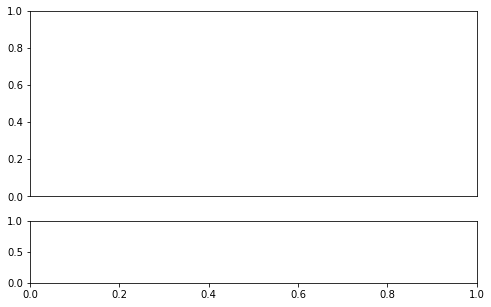

In [18]:
import numpy as np
# def get_mdd(x):
#     """
#     MDD(Maximum Draw-Down)
#     :return: (peak_upper, peak_lower, mdd rate)
#     """
#     arr_v = np.array(x)
#     peak_lower = np.argmax(np.maximum.accumulate(arr_v) - arr_v)
#     peak_upper = np.argmax(arr_v[:peak_lower])
#     return peak_upper, peak_lower, (arr_v[peak_lower] - arr_v[peak_upper]) / arr_v[peak_upper]
# 
# 
data = [['20190219', 125000.0, 127500.0, 123500.0, 126000.0, 57757], ['20190220', 125000.0, 127000.0, 124500.0, 126000.0, 68453], ['20190221', 125500.0, 126000.0, 124000.0, 125000.0, 43961], ['20190222', 125000.0, 125000.0, 123500.0, 125000.0, 31065], ['20190225', 125500.0, 126000.0, 124000.0, 125500.0, 45852], ['20190226', 125000.0, 127000.0, 124500.0, 126500.0, 37404], ['20190227', 126500.0, 127000.0, 124500.0, 126000.0, 36131], ['20190228', 126500.0, 127000.0, 124500.0, 125000.0, 69474], ['20190304', 124500.0, 125500.0, 122500.0, 123500.0, 65517], ['20190305', 123000.0, 125000.0, 122000.0, 124500.0, 35186], ['20190306', 124000.0, 124500.0, 122500.0, 123500.0, 35449], ['20190307', 123500.0, 124000.0, 122000.0, 123500.0, 34768], ['20190308', 122500.0, 122500.0, 120500.0, 121500.0, 35118], ['20190311', 121500.0, 122500.0, 120000.0, 122500.0, 39576], ['20190312', 123000.0, 124000.0, 122000.0, 123500.0, 24117], ['20190313', 123000.0, 123500.0, 121500.0, 123500.0, 37649], ['20190314', 123000.0, 124000.0, 122000.0, 123500.0, 95132], ['20190315', 123000.0, 128000.0, 123000.0, 126500.0, 107246], ['20190318', 127000.0, 131000.0, 126500.0, 131000.0, 74644], ['20190319', 130000.0, 134000.0, 129500.0, 133000.0, 68348], ['20190320', 132000.0, 133000.0, 129500.0, 131000.0, 42697], ['20190321', 130000.0, 132000.0, 127500.0, 128500.0, 54018], ['20190322', 127500.0, 129500.0, 126500.0, 127000.0, 32380], ['20190325', 125500.0, 126500.0, 124000.0, 124500.0, 37185], ['20190326', 124500.0, 125500.0, 123500.0, 124000.0, 45161], ['20190327', 124000.0, 125000.0, 123500.0, 124000.0, 34336], ['20190328', 124000.0, 124500.0, 120500.0, 121500.0, 43518], ['20190329', 122500.0, 125000.0, 122000.0, 124500.0, 39035], ['20190401', 124000.0, 126500.0, 124000.0, 126500.0, 22463], ['20190402', 125500.0, 126500.0, 123500.0, 126000.0, 31754], ['20190403', 124500.0, 128000.0, 124500.0, 128000.0, 36250], ['20190404', 128500.0, 128500.0, 126000.0, 128000.0, 34854], ['20190405', 127500.0, 129000.0, 126000.0, 127500.0, 33513], ['20190408', 127500.0, 128000.0, 126000.0, 128000.0, 39005], ['20190409', 128000.0, 129000.0, 127500.0, 128500.0, 33266], ['20190410', 128000.0, 129000.0, 126500.0, 128000.0, 64476], ['20190411', 128500.0, 129000.0, 125000.0, 125000.0, 84802], ['20190412', 126000.0, 127500.0, 125500.0, 127000.0, 39663], ['20190415', 126500.0, 128500.0, 126000.0, 127000.0, 61140], ['20190416', 127000.0, 129000.0, 126500.0, 128500.0, 40123], ['20190417', 128500.0, 129000.0, 127000.0, 128000.0, 30846], ['20190418', 128000.0, 128500.0, 124000.0, 124500.0, 55346], ['20190419', 124500.0, 125000.0, 122000.0, 123000.0, 53439], ['20190422', 123000.0, 123500.0, 121000.0, 122500.0, 30421], ['20190423', 122500.0, 123500.0, 120500.0, 121500.0, 54997], ['20190424', 122500.0, 122500.0, 119500.0, 120000.0, 63486], ['20190425', 121000.0, 121000.0, 118500.0, 119000.0, 36046], ['20190426', 118500.0, 119500.0, 117000.0, 119000.0, 43749], ['20190429', 119000.0, 119500.0, 117000.0, 119500.0, 33516], ['20190430', 122000.0, 123000.0, 119000.0, 119500.0, 94118], ['20190502', 118500.0, 122000.0, 118000.0, 121000.0, 56723], ['20190503', 121000.0, 122000.0, 119500.0, 120000.0, 35240], ['20190507', 118500.0, 119500.0, 117000.0, 117500.0, 44453], ['20190508', 116500.0, 117000.0, 115000.0, 116500.0, 52805], ['20190509', 117000.0, 117000.0, 113000.0, 113000.0, 116012], ['20190510', 113000.0, 114500.0, 110000.0, 111500.0, 86072], ['20190513', 110500.0, 110500.0, 107500.0, 108500.0, 70847], ['20190514', 107500.0, 108000.0, 105000.0, 106500.0, 92820], ['20190515', 107000.0, 107500.0, 105000.0, 107000.0, 68937], ['20190516', 107000.0, 107500.0, 104000.0, 105000.0, 64047]]
import pandas as pd
df2 = pd.DataFrame(data, columns=['date', 'open', 'high', 'low', 'close', 'volume'])
# # mdd = get_mdd(df['close'])
print(df)

# print('=========================================================')
# print(df2)

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(8, 5))
fig.set_facecolor('w')
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])
axes = []
axes.append(plt.subplot(gs[0]))
axes.append(plt.subplot(gs[1], sharex=axes[0]))
axes[0].get_xaxis().set_visible(False)

from mpl_finance import candlestick_ohlc

x = np.arange(len(df.index))
ohlc = df2[['open', 'high', 'low', 'close']].astype(int).values
dohlc = np.hstack((np.reshape(x, (-1, 1)), ohlc))

print(dohlc)
# 봉차트
candlestick_ohlc(axes[0], dohlc, width=0.5, colorup='r', colordown='b')

# 거래량 차트
axes[1].bar(x, df.volume, color='k', width=0.6, align='center')
# 
# import datetime
# _xticks = []
# _xlabels = []
# _wd_prev = 0
# for _x, d in zip(x, df.date.values):
#     weekday = datetime.datetime.strptime(str(d), '%Y%m%d').weekday()
#     if weekday <= _wd_prev:
#         _xticks.append(_x)
#         _xlabels.append(datetime.datetime.strptime(str(d), '%Y%m%d').strftime('%m/%d'))
#     _wd_prev = weekday
# axes[1].set_xticks(_xticks)
# axes[1].set_xticklabels(_xlabels, rotation=45, minor=False)
# 
# # MDD 그리기
# # axes[0].plot(mdd[:2], df.loc[mdd[:2], 'close'], 'k')
# 
plt.tight_layout()
plt.show()

